In [1]:
# Set up and load data
# Includes
import sys
import os
import numpy as np
import json
import os

# Setup paths containing modules
curr_folder = os.getcwd()
sys.path.insert(0, os.path.join(curr_folder,'modules'))

# Utils imports for loading data
from utils import save_data, load_data, exists_datafolder
from utils import load_SQuAD_train, load_SQuAD_dev
from utils import get_foldername
from utils import merge_artfiles
from utils_EDAplots import plotbar_train_dev,plothist_train_dev

# Import fig stuff
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics

In [2]:

# Load the data with blank classifications
foldername = '.'                                      # Note - load_data by default looks in repo_dir/data
arts_train = load_data('train.json',foldername)
arts_dev = load_data('dev.json',foldername)

Ntrain = len(arts_train)
Ndev = len(arts_dev)
arts = arts_train + arts_dev
Narticles = len(arts)

print ("Narticles in train = " +  str(len(arts_train)))
print ("Narticles in dev = " +  str(len(arts_dev)))
print ("Total articles = " + str(len(arts)))

Narticles in train = 442
Narticles in dev = 35
Total articles = 477


In [3]:
# Take a subset of data
art = arts[:] #in this case, take everything

# Overview of JSON file organization

In [4]:
# Take a random paragraph
p = arts[442]['paragraphs'][0]

In [5]:
# Print keys
print(p.keys())

dict_keys(['qas', 'context', 'context_blanked', 'blank_classification'])


In [6]:
# Keys are as in original SQuAD, except we now have context_blanked and blank_classification
# context_blanked contains the context with selected words blanked out
print(p['context_blanked'])

The Normans ( Norman : Nourmands ; French : Normands ; Latin : Normanni ) were the people who in the ______ and 11th centuries gave their name to Normandy , a region in ______ . They were descended from Norse ( " Norman " comes from " Norseman " ) raiders and pirates from Denmark , Iceland and Norway who , under their leader ______ , agreed to swear fealty to King Charles III of West Francia . Through generations of assimilation and mixing with the native Frankish and Roman - Gaulish populations , their descendants would gradually merge with the Carolingian - based cultures of West Francia . The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the ______ ______ , and it continued to evolve over the succeeding centuries .


In [7]:
# blank_classification classifies words as either 1 or 0, with 1=blank and 0=non-blank
print(p['blank_classification'])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Explore statistics of data

## Preprocessing

In [8]:

# Here, calculate the total # words per article, total blanks per article, and the percentage of
# blanked out words (useful for assessing class imbalance in classification)
atot_words = []
atot_blanks = []
abw_ratio = []           # Ratio of blanks to total # words


for a in arts:
    # Total things up for each paragraph
    ptot_words = [len(p['blank_classification']) for p in a['paragraphs']] #Paragraph total words
    ptot_blanks = [sum(p['blank_classification']) for p in a['paragraphs']] #Paragraph total blanks
    
    # For articles
    atot_words.append(sum(ptot_words))
        # Total blanks per article
    atot_blanks.append(sum(ptot_blanks))
        # Ratio of blanks to words
    abw_ratio.append(sum(ptot_blanks)/sum(ptot_words)*100)

## Total words per article

Note: This includes punctuation, since that's how spacy splits things.

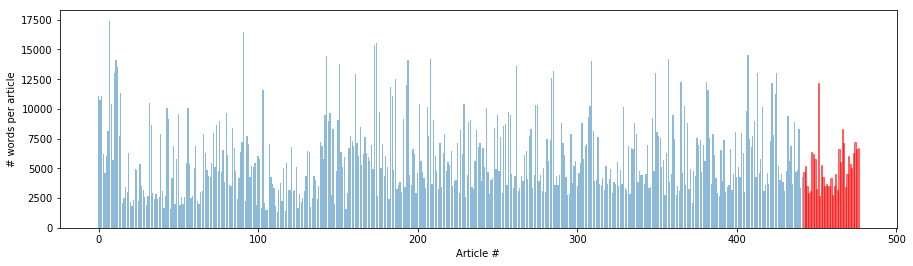

In [10]:

myvar = atot_words
varname = '# words'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

### (blue=train; red=dev)

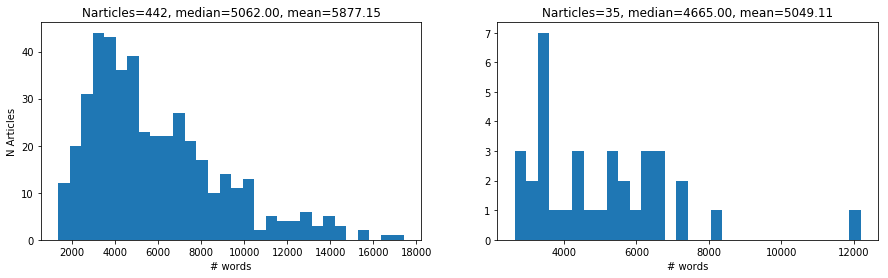

In [12]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles');

### (left=train; right=dev)

## Total blanks per article

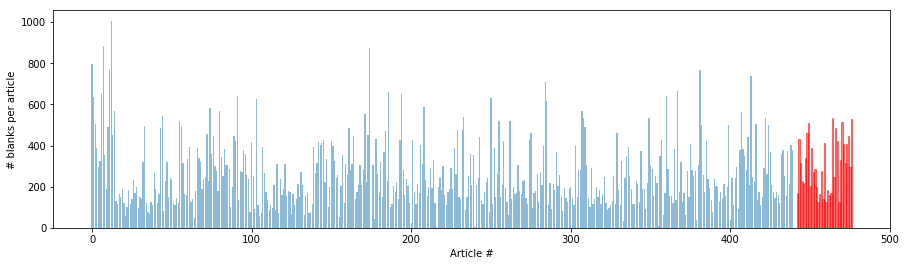

In [14]:

myvar = atot_blanks
varname = '# blanks'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #');

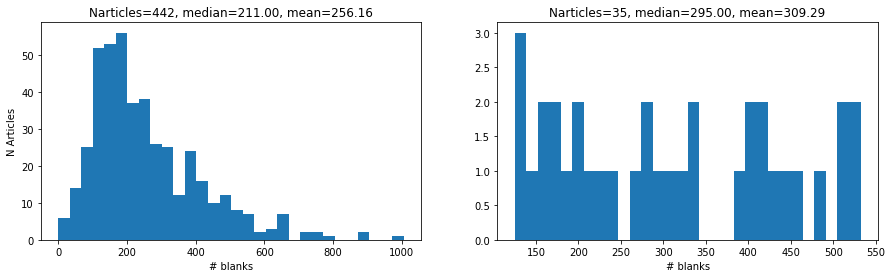

In [15]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles');

### (left=train; right=dev)

In [16]:
# In training set there are on average 256.16 blanks per article and 5877.15 words per article

256.16 / 5877.15
# About 0.04 blanks per word

0.04358575159728781

In [18]:
# Articles with zero blanks
abads = [i for i,atb in enumerate(atot_blanks) if atb == 0]
print(abads)

# These articles are probably all containing "impossible" questions

[175, 440, 441]


## Percentage of blanked words

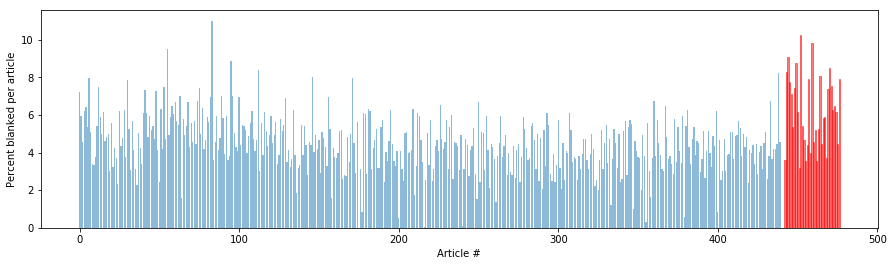

In [21]:

myvar = abw_ratio
varname = 'Percent blanked'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #');

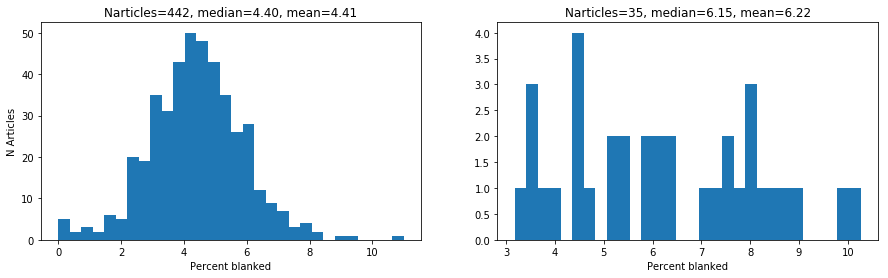

In [22]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles');

### (left=train; right=dev)